In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")

In [169]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv") 
df_sample = pd.read_csv('data/sample_submission.csv')

In [3]:
print(df_train.shape, df_test.shape)

(40455, 11) (13485, 10)


In [4]:
df_train.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983


In [117]:
df_test.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table     x     y     z
0       0.32      Ideal     I     SI1   60.5   58.0  4.43  4.49  2.70
1       1.24    Premium     I     SI1   62.9   60.0  6.80  6.74  4.26
2       1.66    Premium     D     SI1   62.0   59.0  7.55  7.60  4.70
3       0.75    Premium     D     SI2   60.6   56.0  5.94  5.90  3.59
4       1.50       Fair     E     SI2   64.8   55.0  7.26  7.15  4.67
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
13480   1.10    Premium     G     SI1   59.6   60.0  6.74  6.70  4.00
13481   0.90  Very Good     D     SI1   62.1   60.0  6.14  6.20  3.83
13482   0.30      Ideal     F     VS2   62.1   53.3  4.30  4.32  2.68
13483   1.25      Ideal     I     SI1   59.6   59.0  7.01  7.09  4.20
13484   0.81    Premium     F     SI1   61.6   58.0  5.96  5.92  3.66

[13485 rows x 9 columns]>

In [6]:
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True)

In [7]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df_test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_train.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [10]:
df_test.describe()

,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,0.799032,61.758487,57.473652,5.737139,5.739416,3.542883
std,0.468195,1.420037,2.234259,1.111265,1.103297,0.689553
min,0.200000,50.800000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.730000,4.740000,2.920000
50%,0.710000,61.900000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.130000,79.000000,73.000000,10.140000,10.100000,6.430000


In [11]:
df_numericas1 = df_train.select_dtypes(include=np.number)

In [12]:
df_numericas2 = df_test.select_dtypes(include=np.number)

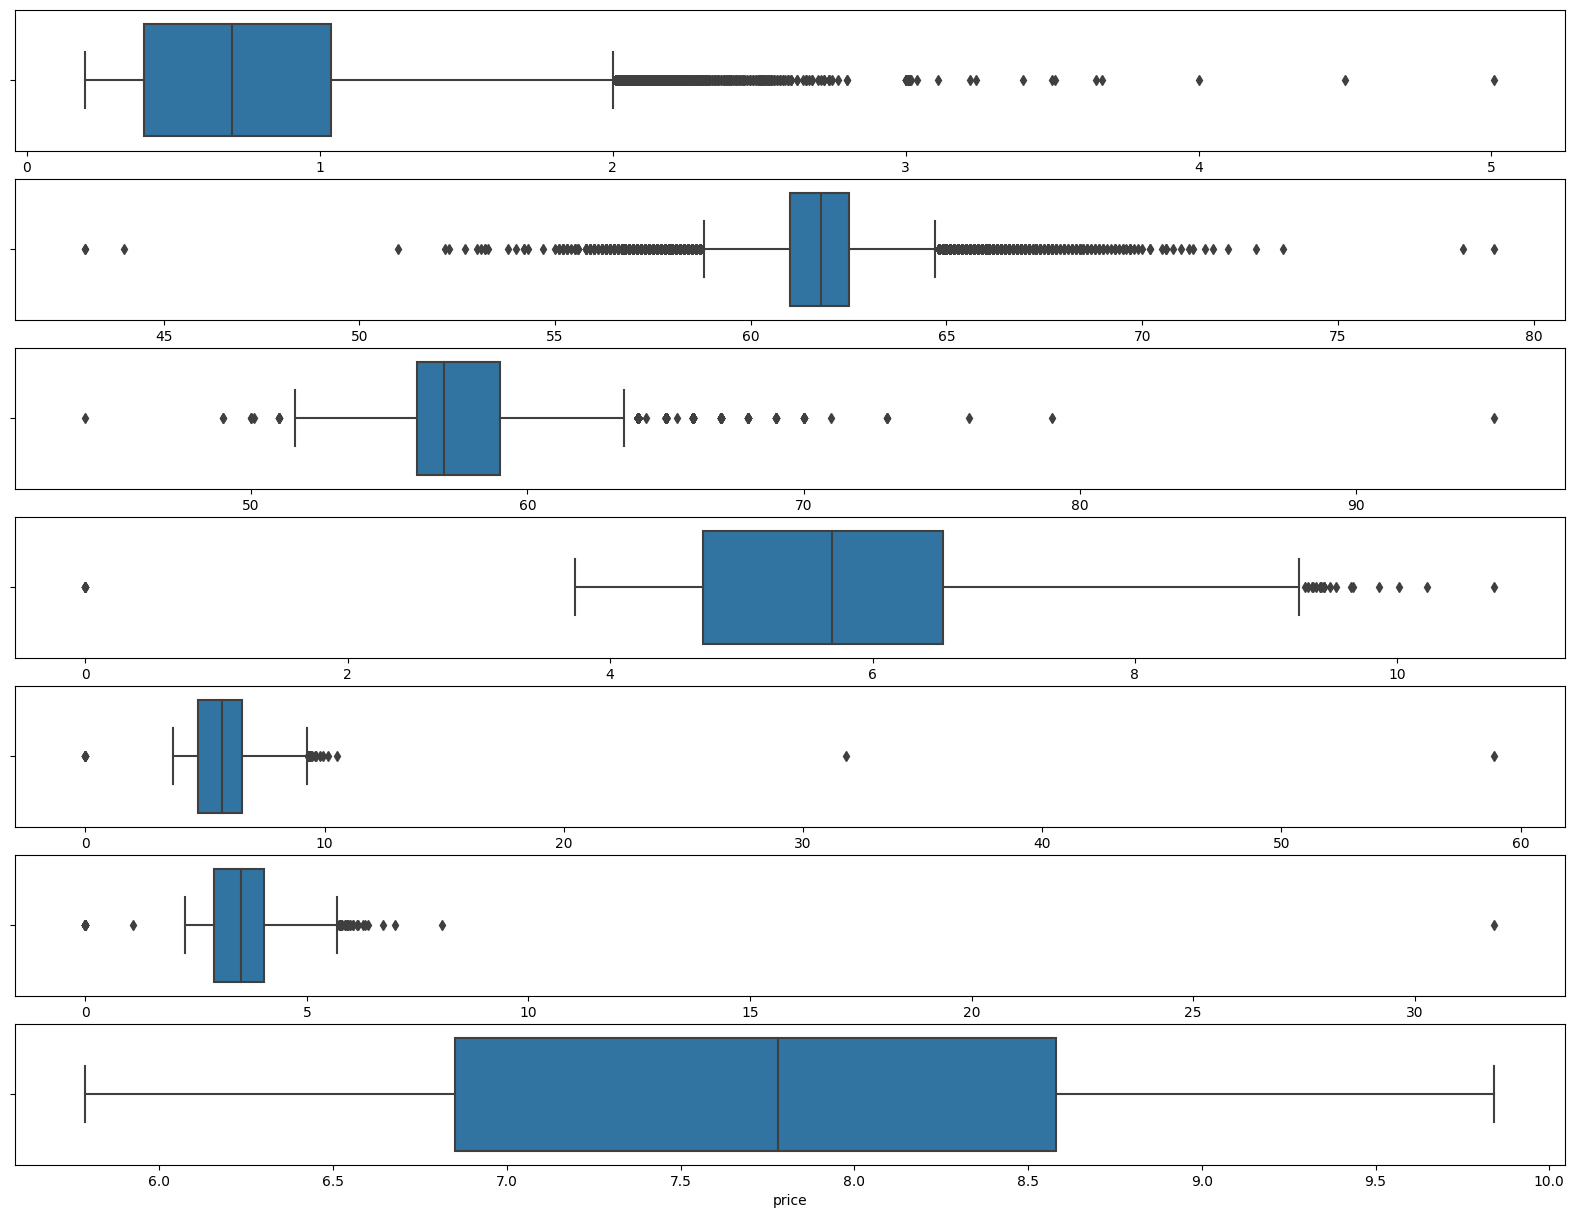

In [13]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas1.columns)):
    sns.boxplot(x=df_numericas1.columns[i], data=df_numericas1, ax=ax[i])
plt.show()

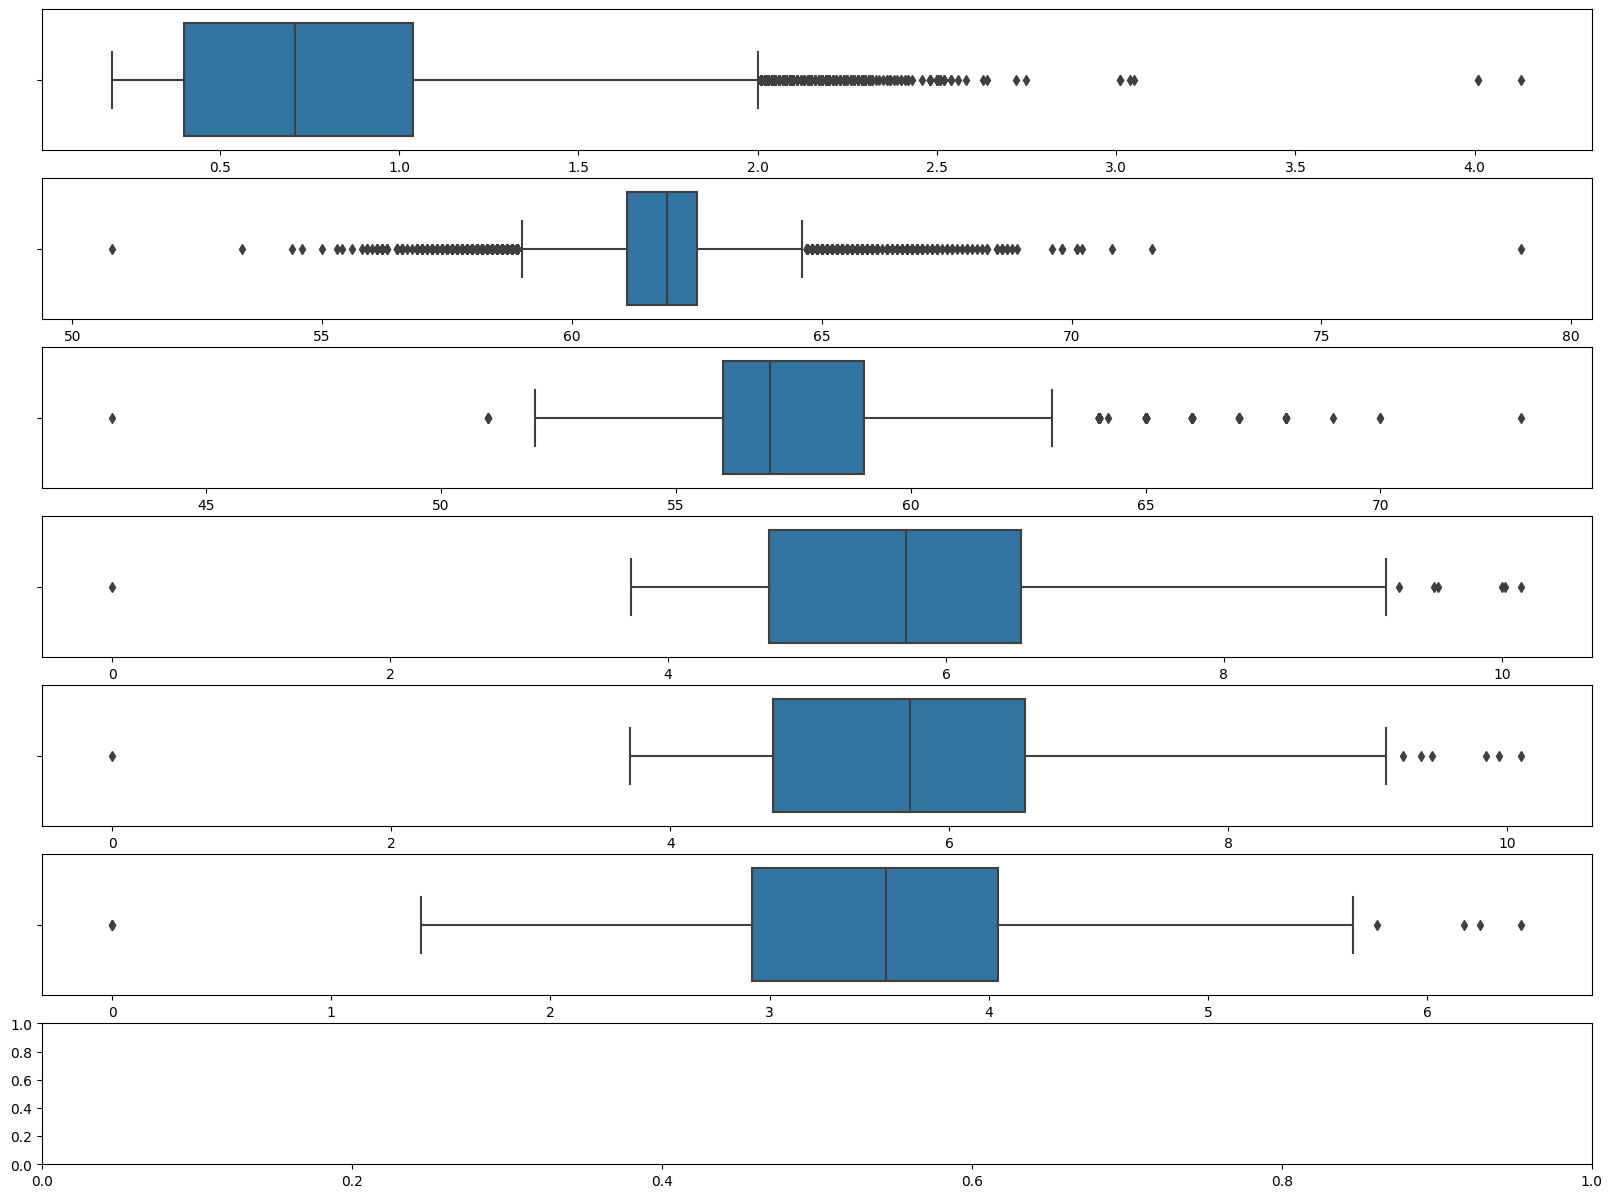

In [14]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas2.columns)):
    sns.boxplot(x=df_numericas2.columns[i], data=df_numericas2, ax=ax[i])
plt.show()

In [15]:
X = df_train.drop("price", axis = 1)
X 

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82
...,...,...,...,...,...,...,...,...,...
40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98
40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22
40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69
40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96


In [16]:
y = df_train["price"]
y

0        6.353
1        9.183
2        7.983
3        8.371
4        6.588
         ...  
40450    6.551
40451    7.382
40452    7.768
40453    8.726
40454    8.771
Name: price, Length: 40455, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [19]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [20]:
lista_columnas = X_train.select_dtypes(include=np.number).columns
lista_columnas

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [21]:
y_train

0        6.599
1        7.499
2        7.573
3        6.649
4        7.769
         ...  
32359    6.168
32360    8.036
32361    7.358
32362    6.513
32363    6.361
Name: price, Length: 32364, dtype: float64

In [23]:
ind = detectar_outliers(lista_columnas, X_train)
print(ind)

{'carat': [38, 66, 90, 100, 179, 181, 210, 212, 240, 266, 280, 290, 291, 305, 398, 428, 528, 570, 617, 661, 691, 702, 709, 729, 775, 805, 820, 845, 851, 879, 974, 1012, 1034, 1044, 1075, 1131, 1132, 1158, 1168, 1174, 1181, 1187, 1228, 1233, 1251, 1302, 1305, 1325, 1350, 1355, 1362, 1412, 1431, 1535, 1559, 1710, 1767, 1775, 1786, 1796, 1829, 1832, 1841, 1897, 1901, 1963, 1981, 2031, 2058, 2076, 2100, 2102, 2116, 2122, 2131, 2198, 2201, 2206, 2210, 2233, 2366, 2388, 2404, 2444, 2523, 2550, 2556, 2560, 2564, 2599, 2615, 2698, 2706, 2735, 2757, 2813, 2870, 2882, 2893, 2909, 2925, 2927, 3019, 3024, 3058, 3096, 3159, 3199, 3206, 3227, 3248, 3273, 3293, 3337, 3370, 3427, 3432, 3471, 3613, 3624, 3675, 3747, 3762, 3767, 3785, 3819, 3841, 3847, 3856, 3921, 3942, 3962, 3992, 3993, 4031, 4048, 4104, 4174, 4270, 4275, 4278, 4313, 4346, 4366, 4376, 4410, 4462, 4483, 4546, 4599, 4666, 4753, 4796, 4855, 4861, 4874, 4883, 4928, 4951, 4980, 4985, 5007, 5086, 5091, 5133, 5135, 5140, 5145, 5161, 5284, 528

In [24]:
valores = list(ind.values())

In [25]:
# hacemos una list comprehension para aplanar nuestra lista de listas

valores = [indice for sublista in valores for indice in sublista]
print(valores)

[38, 66, 90, 100, 179, 181, 210, 212, 240, 266, 280, 290, 291, 305, 398, 428, 528, 570, 617, 661, 691, 702, 709, 729, 775, 805, 820, 845, 851, 879, 974, 1012, 1034, 1044, 1075, 1131, 1132, 1158, 1168, 1174, 1181, 1187, 1228, 1233, 1251, 1302, 1305, 1325, 1350, 1355, 1362, 1412, 1431, 1535, 1559, 1710, 1767, 1775, 1786, 1796, 1829, 1832, 1841, 1897, 1901, 1963, 1981, 2031, 2058, 2076, 2100, 2102, 2116, 2122, 2131, 2198, 2201, 2206, 2210, 2233, 2366, 2388, 2404, 2444, 2523, 2550, 2556, 2560, 2564, 2599, 2615, 2698, 2706, 2735, 2757, 2813, 2870, 2882, 2893, 2909, 2925, 2927, 3019, 3024, 3058, 3096, 3159, 3199, 3206, 3227, 3248, 3273, 3293, 3337, 3370, 3427, 3432, 3471, 3613, 3624, 3675, 3747, 3762, 3767, 3785, 3819, 3841, 3847, 3856, 3921, 3942, 3962, 3992, 3993, 4031, 4048, 4104, 4174, 4270, 4275, 4278, 4313, 4346, 4366, 4376, 4410, 4462, 4483, 4546, 4599, 4666, 4753, 4796, 4855, 4861, 4874, 4883, 4928, 4951, 4980, 4985, 5007, 5086, 5091, 5133, 5135, 5140, 5145, 5161, 5284, 5286, 5321, 5

In [26]:
valores = set(valores) # funcion que devuelve un diccionario con valores no repetidos

In [27]:
# nos hacems¡os una copia del dataframe original

X_sin_outliers = X_train.copy()

In [28]:
X_sin_outliers

,carat,cut,color,clarity,depth,table,x,y,z
0,0.31,Very Good,D,VS2,62.9,55.0,4.31,4.34,2.72
1,0.50,Very Good,E,VS1,60.0,60.0,5.13,5.20,3.10
2,0.75,Ideal,J,SI2,60.8,57.0,5.91,5.87,3.58
3,0.40,Premium,D,SI1,61.7,58.0,4.70,4.74,2.91
4,0.70,Very Good,I,VVS2,63.0,58.0,5.64,5.69,3.57
...,...,...,...,...,...,...,...,...,...
32359,0.32,Premium,G,SI1,62.6,58.0,4.35,4.37,2.73
32360,0.71,Ideal,D,VS1,62.5,57.0,5.71,5.68,3.56
32361,0.50,Very Good,G,VS1,62.9,58.0,5.06,5.08,3.19
32362,0.41,Very Good,E,SI1,60.0,58.0,4.79,4.88,2.90


In [29]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 

final = X_sin_outliers.drop(X_sin_outliers.index[list(valores)] )

In [30]:
y_train = y_train.drop(X_sin_outliers.index[list(valores)] )
y_train

0        6.599
1        7.499
2        7.573
3        6.649
4        7.769
         ...  
32359    6.168
32360    8.036
32361    7.358
32362    6.513
32363    6.361
Name: price, Length: 29592, dtype: float64

In [31]:
final.shape

(29592, 9)

In [32]:
final.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [33]:
orden = ["Ideal", "Good", "Very Good", "Fair", "Premium"]

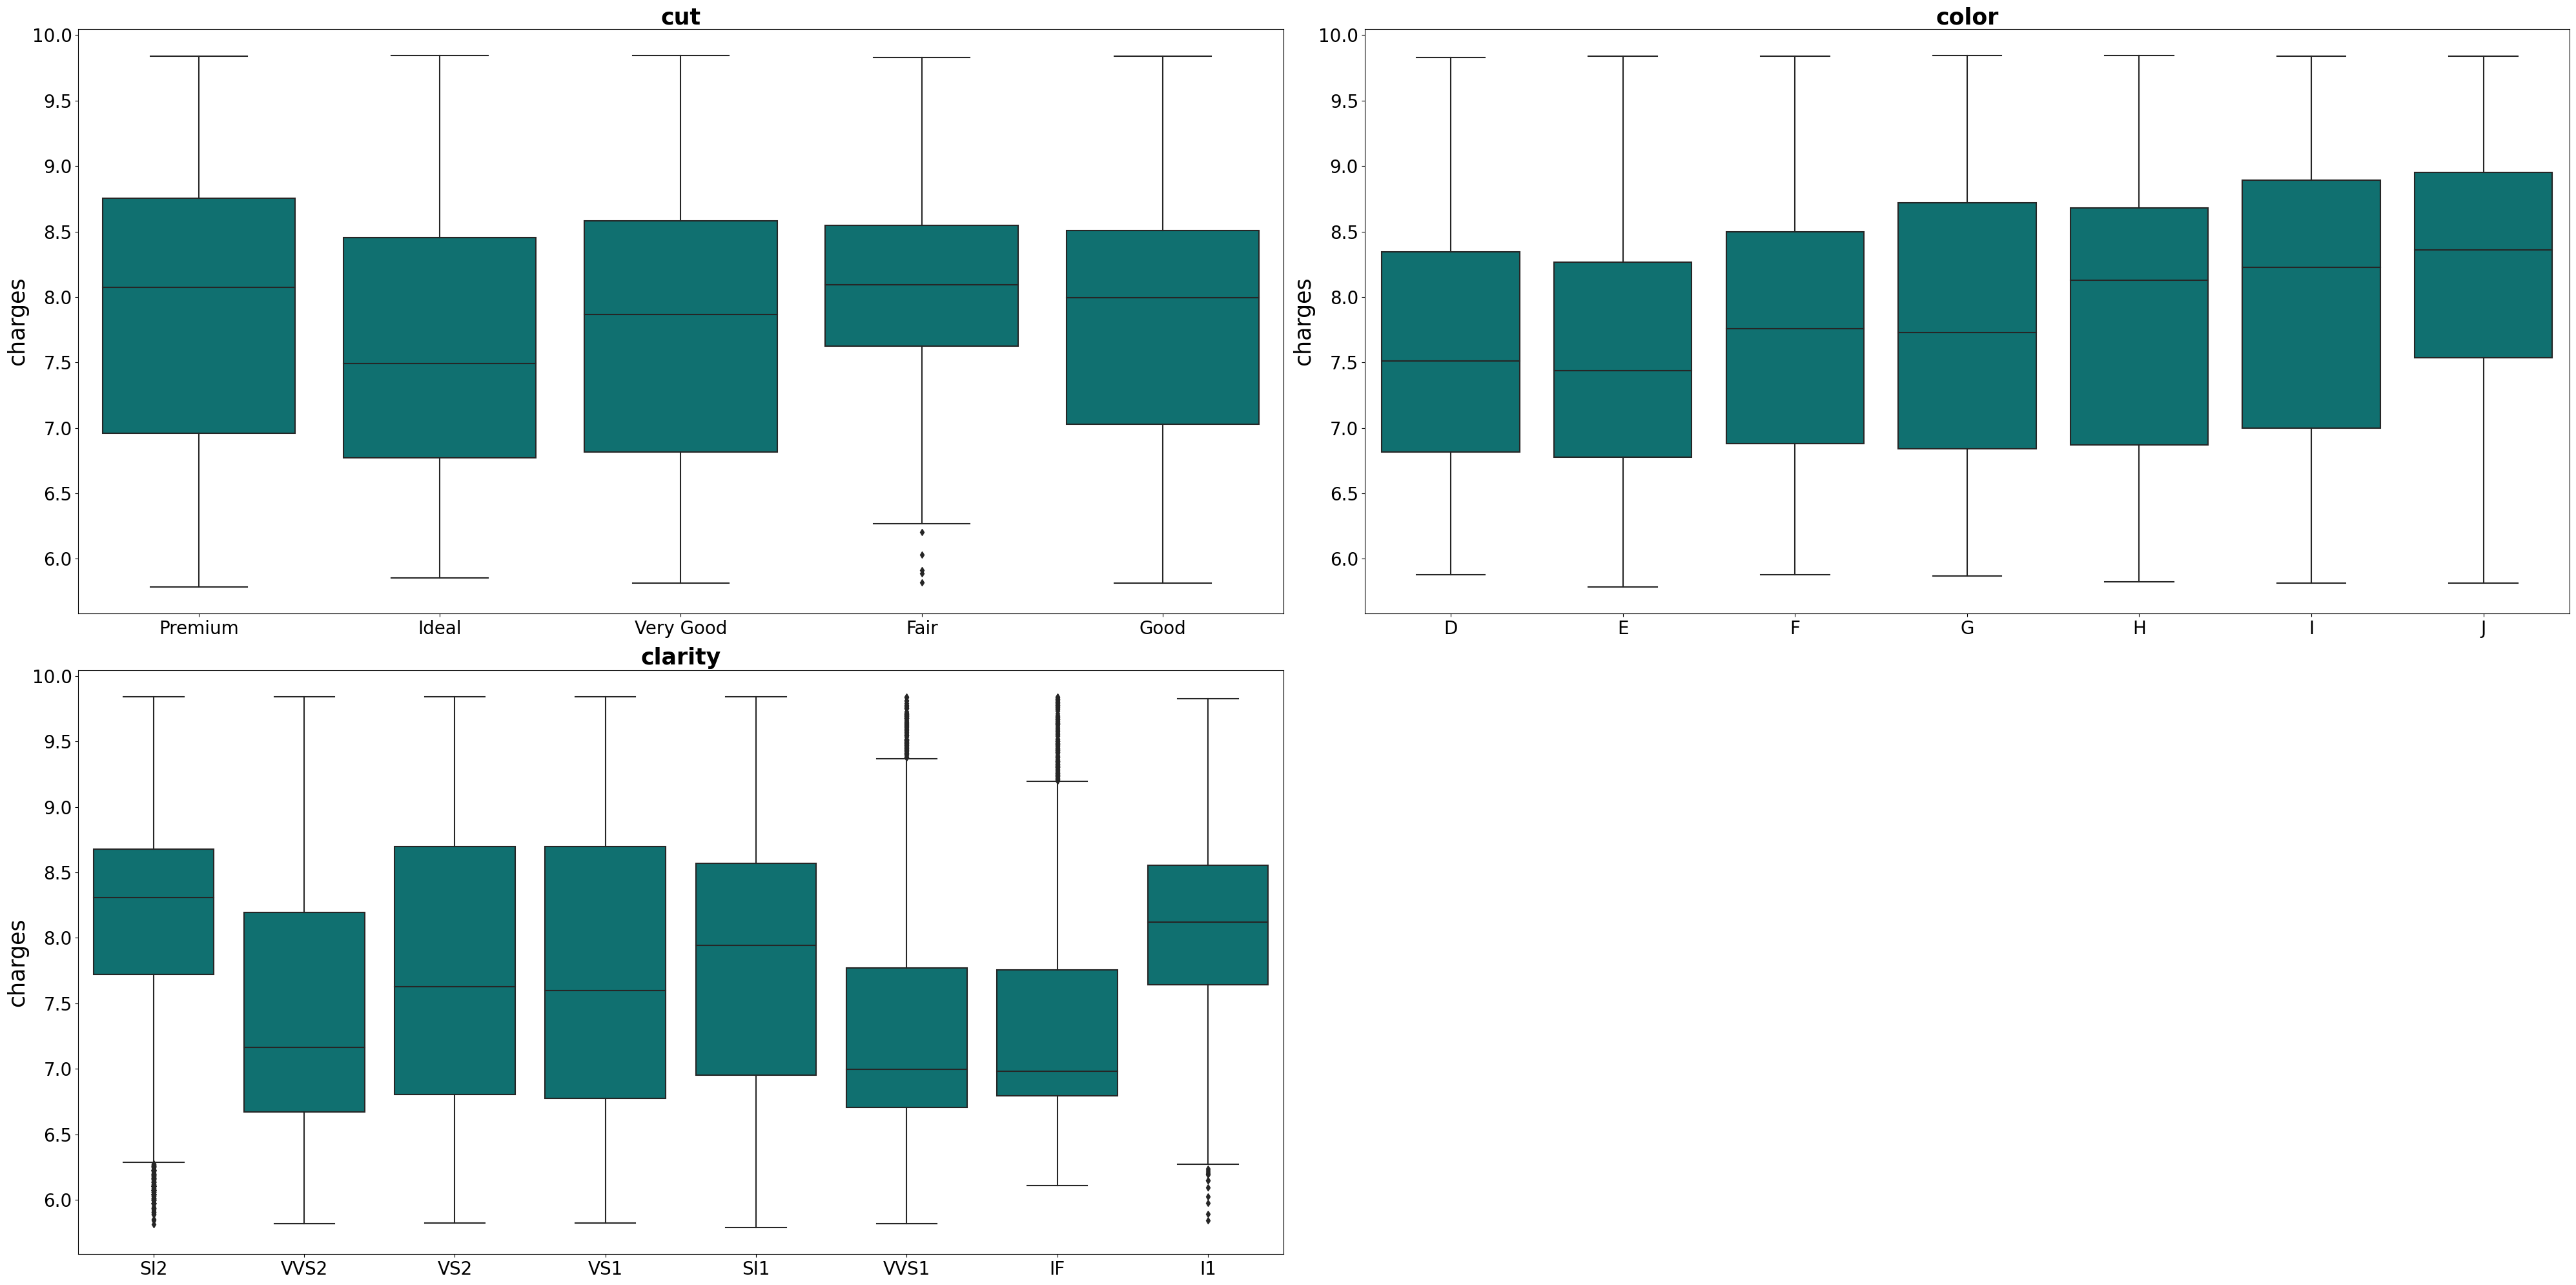

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = X_train.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df_train,
        x = colum,
        y = "price",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [79]:
# iniciamos el método y aplicamos la transformación a los datos. 

ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(X_train[["cut"]])


In [80]:
import pickle

with open('data/ordinal.pkl', 'wb') as o:
    pickle.dump(ordinal, o)

In [81]:
# lo convertimos a dataframe

oe_df =pd.DataFrame(transformados_oe)
oe_df.head()

,0
0,2
1,2
2,0
3,4
4,2


In [37]:
final["cut_new"] = oe_df
final

,carat,cut,color,clarity,depth,table,x,y,z,cut_new
0,0.31,Very Good,D,VS2,62.9,55.0,4.31,4.34,2.72,2
1,0.50,Very Good,E,VS1,60.0,60.0,5.13,5.20,3.10,2
2,0.75,Ideal,J,SI2,60.8,57.0,5.91,5.87,3.58,0
3,0.40,Premium,D,SI1,61.7,58.0,4.70,4.74,2.91,4
4,0.70,Very Good,I,VVS2,63.0,58.0,5.64,5.69,3.57,2
...,...,...,...,...,...,...,...,...,...,...
32359,0.32,Premium,G,SI1,62.6,58.0,4.35,4.37,2.73,4
32360,0.71,Ideal,D,VS1,62.5,57.0,5.71,5.68,3.56,0
32361,0.50,Very Good,G,VS1,62.9,58.0,5.06,5.08,3.19,2
32362,0.41,Very Good,E,SI1,60.0,58.0,4.79,4.88,2.90,2


In [38]:
final.drop("cut", axis = 1, inplace = True)
final

,carat,color,clarity,depth,table,x,y,z,cut_new
0,0.31,D,VS2,62.9,55.0,4.31,4.34,2.72,2
1,0.50,E,VS1,60.0,60.0,5.13,5.20,3.10,2
2,0.75,J,SI2,60.8,57.0,5.91,5.87,3.58,0
3,0.40,D,SI1,61.7,58.0,4.70,4.74,2.91,4
4,0.70,I,VVS2,63.0,58.0,5.64,5.69,3.57,2
...,...,...,...,...,...,...,...,...,...
32359,0.32,G,SI1,62.6,58.0,4.35,4.37,2.73,4
32360,0.71,D,VS1,62.5,57.0,5.71,5.68,3.56,0
32361,0.50,G,VS1,62.9,58.0,5.06,5.08,3.19,2
32362,0.41,E,SI1,60.0,58.0,4.79,4.88,2.90,2


In [39]:
# iniciamos el método

le = LabelEncoder()

In [40]:
transformados_le = le.fit_transform(final[["color"]])

In [74]:
import pickle

with open('data/LabelEncoder.pkl', 'wb') as l:
    pickle.dump(le, l)

In [41]:
final["color_enco"] = transformados_le
final

,carat,color,clarity,depth,table,x,y,z,cut_new,color_enco
0,0.31,D,VS2,62.9,55.0,4.31,4.34,2.72,2,0
1,0.50,E,VS1,60.0,60.0,5.13,5.20,3.10,2,1
2,0.75,J,SI2,60.8,57.0,5.91,5.87,3.58,0,6
3,0.40,D,SI1,61.7,58.0,4.70,4.74,2.91,4,0
4,0.70,I,VVS2,63.0,58.0,5.64,5.69,3.57,2,5
...,...,...,...,...,...,...,...,...,...,...
32359,0.32,G,SI1,62.6,58.0,4.35,4.37,2.73,4,3
32360,0.71,D,VS1,62.5,57.0,5.71,5.68,3.56,0,0
32361,0.50,G,VS1,62.9,58.0,5.06,5.08,3.19,2,3
32362,0.41,E,SI1,60.0,58.0,4.79,4.88,2.90,2,1


In [42]:
final.drop("color", axis = 1, inplace = True)
final

,carat,clarity,depth,table,x,y,z,cut_new,color_enco
0,0.31,VS2,62.9,55.0,4.31,4.34,2.72,2,0
1,0.50,VS1,60.0,60.0,5.13,5.20,3.10,2,1
2,0.75,SI2,60.8,57.0,5.91,5.87,3.58,0,6
3,0.40,SI1,61.7,58.0,4.70,4.74,2.91,4,0
4,0.70,VVS2,63.0,58.0,5.64,5.69,3.57,2,5
...,...,...,...,...,...,...,...,...,...
32359,0.32,SI1,62.6,58.0,4.35,4.37,2.73,4,3
32360,0.71,VS1,62.5,57.0,5.71,5.68,3.56,0,0
32361,0.50,VS1,62.9,58.0,5.06,5.08,3.19,2,3
32362,0.41,SI1,60.0,58.0,4.79,4.88,2.90,2,1


In [43]:
# iniciamos el método de OneHot Encoder

oh = OneHotEncoder()

In [44]:
# hacemos la codificación de los datos para la variable dada 

transformados = oh.fit_transform(final[["clarity"]])

In [75]:
import pickle

with open('data/OneHotEncoder.pkl', 'wb') as t:
    pickle.dump(oh, t)

In [45]:
# convertimos nuestro array con la codificación hecha en un dataframe

oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [46]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()

In [47]:
oh_df.index = final.index
oh_df

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
32359,0,0,1,0,0,0,0,0
32360,0,0,0,0,1,0,0,0
32361,0,0,0,0,1,0,0,0
32362,0,0,1,0,0,0,0,0


In [48]:
final[oh_df.columns] = oh_df
final

,carat,clarity,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,VS2,62.9,55.0,4.31,4.34,2.72,2,0,0,0,0,0,0,1,0,0
1,0.50,VS1,60.0,60.0,5.13,5.20,3.10,2,1,0,0,0,0,1,0,0,0
2,0.75,SI2,60.8,57.0,5.91,5.87,3.58,0,6,0,0,0,1,0,0,0,0
3,0.40,SI1,61.7,58.0,4.70,4.74,2.91,4,0,0,0,1,0,0,0,0,0
4,0.70,VVS2,63.0,58.0,5.64,5.69,3.57,2,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,0.32,SI1,62.6,58.0,4.35,4.37,2.73,4,3,0,0,1,0,0,0,0,0
32360,0.71,VS1,62.5,57.0,5.71,5.68,3.56,0,0,0,0,0,0,1,0,0,0
32361,0.50,VS1,62.9,58.0,5.06,5.08,3.19,2,3,0,0,0,0,1,0,0,0
32362,0.41,SI1,60.0,58.0,4.79,4.88,2.90,2,1,0,0,1,0,0,0,0,0


In [49]:
final.drop("clarity", axis = 1, inplace = True)
final

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,62.9,55.0,4.31,4.34,2.72,2,0,0,0,0,0,0,1,0,0
1,0.50,60.0,60.0,5.13,5.20,3.10,2,1,0,0,0,0,1,0,0,0
2,0.75,60.8,57.0,5.91,5.87,3.58,0,6,0,0,0,1,0,0,0,0
3,0.40,61.7,58.0,4.70,4.74,2.91,4,0,0,0,1,0,0,0,0,0
4,0.70,63.0,58.0,5.64,5.69,3.57,2,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,0.32,62.6,58.0,4.35,4.37,2.73,4,3,0,0,1,0,0,0,0,0
32360,0.71,62.5,57.0,5.71,5.68,3.56,0,0,0,0,0,0,1,0,0,0
32361,0.50,62.9,58.0,5.06,5.08,3.19,2,3,0,0,0,0,1,0,0,0
32362,0.41,60.0,58.0,4.79,4.88,2.90,2,1,0,0,1,0,0,0,0,0


In [50]:
final

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,62.9,55.0,4.31,4.34,2.72,2,0,0,0,0,0,0,1,0,0
1,0.50,60.0,60.0,5.13,5.20,3.10,2,1,0,0,0,0,1,0,0,0
2,0.75,60.8,57.0,5.91,5.87,3.58,0,6,0,0,0,1,0,0,0,0
3,0.40,61.7,58.0,4.70,4.74,2.91,4,0,0,0,1,0,0,0,0,0
4,0.70,63.0,58.0,5.64,5.69,3.57,2,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,0.32,62.6,58.0,4.35,4.37,2.73,4,3,0,0,1,0,0,0,0,0
32360,0.71,62.5,57.0,5.71,5.68,3.56,0,0,0,0,0,0,1,0,0,0
32361,0.50,62.9,58.0,5.06,5.08,3.19,2,3,0,0,0,0,1,0,0,0
32362,0.41,60.0,58.0,4.79,4.88,2.90,2,1,0,0,1,0,0,0,0,0


In [51]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,Premium,D,SI1,60.2,58.0,4.43,4.40,2.66
1,0.42,Premium,G,VS1,60.5,59.0,4.79,4.83,2.91
2,1.64,Premium,H,SI2,61.9,58.0,7.58,7.54,4.68
3,0.91,Premium,I,VS2,62.7,58.0,6.14,6.18,3.86
4,1.01,Very Good,G,SI1,62.7,58.0,6.35,6.40,4.00
...,...,...,...,...,...,...,...,...,...
8086,1.04,Very Good,D,VS1,62.3,59.0,6.39,6.48,4.01
8087,0.71,Ideal,F,VS1,62.6,55.0,5.71,5.67,3.56
8088,0.31,Premium,D,VS2,62.0,59.0,4.32,4.36,2.69
8089,0.51,Very Good,F,VS2,63.5,56.0,5.09,5.05,3.22


In [52]:
ordinal.transform(X_test[["cut"]])

array([[4],
       [4],
       [4],
       ...,
       [4],
       [2],
       [1]])

In [53]:
# lo convertimos a dataframe

oe_df1 =pd.DataFrame(ordinal.transform(X_test[["cut"]]))
oe_df1.head()

,0
0,4
1,4
2,4
3,4
4,2


In [54]:
final_test = X_test.copy()
final_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,Premium,D,SI1,60.2,58.0,4.43,4.40,2.66
1,0.42,Premium,G,VS1,60.5,59.0,4.79,4.83,2.91
2,1.64,Premium,H,SI2,61.9,58.0,7.58,7.54,4.68
3,0.91,Premium,I,VS2,62.7,58.0,6.14,6.18,3.86
4,1.01,Very Good,G,SI1,62.7,58.0,6.35,6.40,4.00
...,...,...,...,...,...,...,...,...,...
8086,1.04,Very Good,D,VS1,62.3,59.0,6.39,6.48,4.01
8087,0.71,Ideal,F,VS1,62.6,55.0,5.71,5.67,3.56
8088,0.31,Premium,D,VS2,62.0,59.0,4.32,4.36,2.69
8089,0.51,Very Good,F,VS2,63.5,56.0,5.09,5.05,3.22


In [170]:
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [171]:
ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe1 = ordinal.fit_transform(df_test[["cut"]])

In [172]:
df_test["cut_new"] = transformados_oe1
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z,cut_new
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70,0
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26,4
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70,4
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,4
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67,3
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00,4
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83,2
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68,0
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20,0


In [173]:
transformados_le1 = le.fit_transform(df_test[["color"]])
df_test["color_enco"] = transformados_le1
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z,cut_new,color_enco
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70,0,5
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26,4,5
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70,4,0
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,4,0
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00,4,3
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83,2,0
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68,0,2
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20,0,5


In [174]:
df_test.reset_index(drop=True, inplace=True)

In [175]:
def one_hot_encoder(dff, columnas):
    oh = OneHotEncoder()
    transformados = oh.fit_transform(dff[columnas])
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    dff[oh_df.columns] = oh_df
    dff.drop(columnas, axis = 1, inplace = True)
    with open(f"data/encoding{columnas[0]}.pkl", "wb") as s:
        pickle.dump(oh, s)
    return dff

In [176]:
df_test = one_hot_encoder(df_test, ["clarity"])
df_test

,id,carat,cut,color,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.32,Ideal,I,60.5,58.0,4.43,4.49,2.70,0,5,0,0,1,0,0,0,0,0
1,1,1.24,Premium,I,62.9,60.0,6.80,6.74,4.26,4,5,0,0,1,0,0,0,0,0
2,2,1.66,Premium,D,62.0,59.0,7.55,7.60,4.70,4,0,0,0,1,0,0,0,0,0
3,3,0.75,Premium,D,60.6,56.0,5.94,5.90,3.59,4,0,0,0,0,1,0,0,0,0
4,4,1.50,Fair,E,64.8,55.0,7.26,7.15,4.67,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,59.6,60.0,6.74,6.70,4.00,4,3,0,0,1,0,0,0,0,0
13481,13481,0.90,Very Good,D,62.1,60.0,6.14,6.20,3.83,2,0,0,0,1,0,0,0,0,0
13482,13482,0.30,Ideal,F,62.1,53.3,4.30,4.32,2.68,0,2,0,0,0,0,0,1,0,0
13483,13483,1.25,Ideal,I,59.6,59.0,7.01,7.09,4.20,0,5,0,0,1,0,0,0,0,0


In [177]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df2.columns = oh.get_feature_names_out()
oh_df2.index = final.index
oh_df2

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
32359,0,0,1,0,0,0,0,0
32360,0,0,0,0,1,0,0,0
32361,0,0,0,0,1,0,0,0
32362,0,0,1,0,0,0,0,0


In [178]:
df_test[oh_df1.columns] = oh_df2
df_test

,id,carat,cut,color,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.32,Ideal,I,60.5,58.0,4.43,4.49,2.70,0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1.24,Premium,I,62.9,60.0,6.80,6.74,4.26,4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.66,Premium,D,62.0,59.0,7.55,7.60,4.70,4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.75,Premium,D,60.6,56.0,5.94,5.90,3.59,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1.50,Fair,E,64.8,55.0,7.26,7.15,4.67,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,59.6,60.0,6.74,6.70,4.00,4,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13481,13481,0.90,Very Good,D,62.1,60.0,6.14,6.20,3.83,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13482,13482,0.30,Ideal,F,62.1,53.3,4.30,4.32,2.68,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13483,13483,1.25,Ideal,I,59.6,59.0,7.01,7.09,4.20,0,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
final_test["cut_new"] = oe_df1
final_test

,carat,cut,color,clarity,depth,table,x,y,z,cut_new
0,0.32,Premium,D,SI1,60.2,58.0,4.43,4.40,2.66,4
1,0.42,Premium,G,VS1,60.5,59.0,4.79,4.83,2.91,4
2,1.64,Premium,H,SI2,61.9,58.0,7.58,7.54,4.68,4
3,0.91,Premium,I,VS2,62.7,58.0,6.14,6.18,3.86,4
4,1.01,Very Good,G,SI1,62.7,58.0,6.35,6.40,4.00,2
...,...,...,...,...,...,...,...,...,...,...
8086,1.04,Very Good,D,VS1,62.3,59.0,6.39,6.48,4.01,2
8087,0.71,Ideal,F,VS1,62.6,55.0,5.71,5.67,3.56,0
8088,0.31,Premium,D,VS2,62.0,59.0,4.32,4.36,2.69,4
8089,0.51,Very Good,F,VS2,63.5,56.0,5.09,5.05,3.22,2


In [56]:
transformados_le1 = le.transform(final_test[["color"]])
transformados_le1

array([0, 3, 4, ..., 0, 2, 1])

In [57]:
final_test["color_enco"] = transformados_le1
final_test

,carat,cut,color,clarity,depth,table,x,y,z,cut_new,color_enco
0,0.32,Premium,D,SI1,60.2,58.0,4.43,4.40,2.66,4,0
1,0.42,Premium,G,VS1,60.5,59.0,4.79,4.83,2.91,4,3
2,1.64,Premium,H,SI2,61.9,58.0,7.58,7.54,4.68,4,4
3,0.91,Premium,I,VS2,62.7,58.0,6.14,6.18,3.86,4,5
4,1.01,Very Good,G,SI1,62.7,58.0,6.35,6.40,4.00,2,3
...,...,...,...,...,...,...,...,...,...,...,...
8086,1.04,Very Good,D,VS1,62.3,59.0,6.39,6.48,4.01,2,0
8087,0.71,Ideal,F,VS1,62.6,55.0,5.71,5.67,3.56,0,2
8088,0.31,Premium,D,VS2,62.0,59.0,4.32,4.36,2.69,4,0
8089,0.51,Very Good,F,VS2,63.5,56.0,5.09,5.05,3.22,2,2


In [58]:
transformados1 = oh.transform(final_test[["clarity"]])
transformados1

<8091x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8091 stored elements in Compressed Sparse Row format>

In [59]:
oh_df1 = pd.DataFrame(transformados1.toarray(), dtype = int)
oh_df1.head()

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0


In [60]:
oh_df1.columns = oh.get_feature_names_out()

In [61]:
oh_df1.index = final_test.index
oh_df1

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8086,0,0,0,0,1,0,0,0
8087,0,0,0,0,1,0,0,0
8088,0,0,0,0,0,1,0,0
8089,0,0,0,0,0,1,0,0


In [62]:
final_test[oh_df.columns] = oh_df1
final_test

,carat,cut,color,clarity,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.32,Premium,D,SI1,60.2,58.0,4.43,4.40,2.66,4,0,0,0,1,0,0,0,0,0
1,0.42,Premium,G,VS1,60.5,59.0,4.79,4.83,2.91,4,3,0,0,0,0,1,0,0,0
2,1.64,Premium,H,SI2,61.9,58.0,7.58,7.54,4.68,4,4,0,0,0,1,0,0,0,0
3,0.91,Premium,I,VS2,62.7,58.0,6.14,6.18,3.86,4,5,0,0,0,0,0,1,0,0
4,1.01,Very Good,G,SI1,62.7,58.0,6.35,6.40,4.00,2,3,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,1.04,Very Good,D,VS1,62.3,59.0,6.39,6.48,4.01,2,0,0,0,0,0,1,0,0,0
8087,0.71,Ideal,F,VS1,62.6,55.0,5.71,5.67,3.56,0,2,0,0,0,0,1,0,0,0
8088,0.31,Premium,D,VS2,62.0,59.0,4.32,4.36,2.69,4,0,0,0,0,0,0,1,0,0
8089,0.51,Very Good,F,VS2,63.5,56.0,5.09,5.05,3.22,2,2,0,0,0,0,0,1,0,0


In [63]:
final_test.drop(["cut", "color", "clarity"], axis=1, inplace=True)
final_test

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.32,60.2,58.0,4.43,4.40,2.66,4,0,0,0,1,0,0,0,0,0
1,0.42,60.5,59.0,4.79,4.83,2.91,4,3,0,0,0,0,1,0,0,0
2,1.64,61.9,58.0,7.58,7.54,4.68,4,4,0,0,0,1,0,0,0,0
3,0.91,62.7,58.0,6.14,6.18,3.86,4,5,0,0,0,0,0,1,0,0
4,1.01,62.7,58.0,6.35,6.40,4.00,2,3,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,1.04,62.3,59.0,6.39,6.48,4.01,2,0,0,0,0,0,1,0,0,0
8087,0.71,62.6,55.0,5.71,5.67,3.56,0,2,0,0,0,0,1,0,0,0
8088,0.31,62.0,59.0,4.32,4.36,2.69,4,0,0,0,0,0,0,1,0,0
8089,0.51,63.5,56.0,5.09,5.05,3.22,2,2,0,0,0,0,0,1,0,0


In [64]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [32,34],
         "min_samples_split": [10,20,30],
         "max_features": [5,6,7], 
         "min_samples_leaf": [10,20,30]}


# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestRegressor(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [65]:
y_train

0        6.599
1        7.499
2        7.573
3        6.649
4        7.769
         ...  
32359    6.168
32360    8.036
32361    7.358
32362    6.513
32363    6.361
Name: price, Length: 29592, dtype: float64

In [66]:
final

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,62.9,55.0,4.31,4.34,2.72,2,0,0,0,0,0,0,1,0,0
1,0.50,60.0,60.0,5.13,5.20,3.10,2,1,0,0,0,0,1,0,0,0
2,0.75,60.8,57.0,5.91,5.87,3.58,0,6,0,0,0,1,0,0,0,0
3,0.40,61.7,58.0,4.70,4.74,2.91,4,0,0,0,1,0,0,0,0,0
4,0.70,63.0,58.0,5.64,5.69,3.57,2,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,0.32,62.6,58.0,4.35,4.37,2.73,4,3,0,0,1,0,0,0,0,0
32360,0.71,62.5,57.0,5.71,5.68,3.56,0,0,0,0,0,0,1,0,0,0
32361,0.50,62.9,58.0,5.06,5.08,3.19,2,3,0,0,0,0,1,0,0,0
32362,0.41,60.0,58.0,4.79,4.88,2.90,2,1,0,0,1,0,0,0,0,0


In [87]:
final

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,62.9,55.0,4.31,4.34,2.72,2,0,0,0,0,0,0,1,0,0
1,0.50,60.0,60.0,5.13,5.20,3.10,2,1,0,0,0,0,1,0,0,0
2,0.75,60.8,57.0,5.91,5.87,3.58,0,6,0,0,0,1,0,0,0,0
3,0.40,61.7,58.0,4.70,4.74,2.91,4,0,0,0,1,0,0,0,0,0
4,0.70,63.0,58.0,5.64,5.69,3.57,2,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,0.32,62.6,58.0,4.35,4.37,2.73,4,3,0,0,1,0,0,0,0,0
32360,0.71,62.5,57.0,5.71,5.68,3.56,0,0,0,0,0,0,1,0,0,0
32361,0.50,62.9,58.0,5.06,5.08,3.19,2,3,0,0,0,0,1,0,0,0
32362,0.41,60.0,58.0,4.79,4.88,2.90,2,1,0,0,1,0,0,0,0,0


In [88]:
final_test

,carat,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.32,60.2,58.0,4.43,4.40,2.66,4,0,0,0,1,0,0,0,0,0
1,0.42,60.5,59.0,4.79,4.83,2.91,4,3,0,0,0,0,1,0,0,0
2,1.64,61.9,58.0,7.58,7.54,4.68,4,4,0,0,0,1,0,0,0,0
3,0.91,62.7,58.0,6.14,6.18,3.86,4,5,0,0,0,0,0,1,0,0
4,1.01,62.7,58.0,6.35,6.40,4.00,2,3,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,1.04,62.3,59.0,6.39,6.48,4.01,2,0,0,0,0,0,1,0,0,0
8087,0.71,62.6,55.0,5.71,5.67,3.56,0,2,0,0,0,0,1,0,0,0
8088,0.31,62.0,59.0,4.32,4.36,2.69,4,0,0,0,0,0,0,1,0,0
8089,0.51,63.5,56.0,5.09,5.05,3.22,2,2,0,0,0,0,0,1,0,0


In [67]:
%%time
random_forest.fit(final, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
CPU times: total: 9.44 s
Wall time: 5min 18s


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [32, 34], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [68]:
random_forest.best_params_

{'max_depth': 32,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [94]:
# guardamos el mejor modelo para el primer dataframe
with open("data/random_forest.pkl", "wb") as archivo:
        pickle.dump(random_forest, archivo)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


In [180]:
df_test

,id,carat,cut,color,depth,table,x,y,z,cut_new,color_enco,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.32,Ideal,I,60.5,58.0,4.43,4.49,2.70,0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1.24,Premium,I,62.9,60.0,6.80,6.74,4.26,4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.66,Premium,D,62.0,59.0,7.55,7.60,4.70,4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.75,Premium,D,60.6,56.0,5.94,5.90,3.59,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1.50,Fair,E,64.8,55.0,7.26,7.15,4.67,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,59.6,60.0,6.74,6.70,4.00,4,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13481,13481,0.90,Very Good,D,62.1,60.0,6.14,6.20,3.83,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13482,13482,0.30,Ideal,F,62.1,53.3,4.30,4.32,2.68,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13483,13483,1.25,Ideal,I,59.6,59.0,7.01,7.09,4.20,0,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [179]:
df_test5 = random_forest.predict(df_test)
df_test5

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- color
- cut
- id


In [155]:
df_test = pd.DataFrame(df_test_final)
df_test

,id,price,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,6.543671,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,6.865914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,9.053764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,8.177452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,8.466988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8086,8086,8.962810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8087,8087,7.975033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8088,8088,6.578258,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8089,8089,7.342526,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [167]:
print(len(df_test_final))

8091


In [108]:
df_test_final["id"] = range(8091)
df_test_final

,0,nueva_colum,id
0,6.543671,0,0
1,6.865914,1,1
2,9.053764,2,2
3,8.177452,3,3
4,8.466988,4,4
...,...,...,...
8086,8.962810,8086,8086
8087,7.975033,8087,8087
8088,6.578258,8088,8088
8089,7.342526,8089,8089


In [111]:
df_test_final.drop(columns=["nueva_colum"], axis=1, inplace=True)
df_test_final

,0,id
0,6.543671,0
1,6.865914,1
2,9.053764,2
3,8.177452,3
4,8.466988,4
...,...,...
8086,8.962810,8086
8087,7.975033,8087
8088,6.578258,8088
8089,7.342526,8089


In [112]:
df_test_final[0], df_test_final["id"] = df_test_final["id"].values, df_test_final[0].values

In [114]:
df_test_final = df_test_final.rename(columns={"id":"price" , 0: "id"})
df_test_final

,id,price
0,0,6.543671
1,1,6.865914
2,2,9.053764
3,3,8.177452
4,4,8.466988
...,...,...
8086,8086,8.962810
8087,8087,7.975033
8088,8088,6.578258
8089,8089,7.342526


In [116]:
df_test_final.to_csv("data/df_submission.csv", index=False)